## Training TinyVGGNet on FLowers17

#### Importing Necessary Packages

In [1]:
from drig.preprocessors import ImageToArrayPreprocessor, UniformAspectPreprocessor
from drig.datum import ImageDatumLoader
from drig.datum_config import Flowers17Config as config
from drig.config import TinyVGGNetImage, ImageCast
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.model_selection import train_test_split
from drig.networks import TinyVGGNet
from keras.optimizers import SGD
from sklearn.metrics import classification_report
from drig.utils import plot_training_metrics, plot_network, \
display_image_data, display_prediction, display_image, \
visualize_network, plot_confusion_mesh, confusion_mesh, random_image, display_prediction, preprocess_image

#### Displaying Sample Image Data

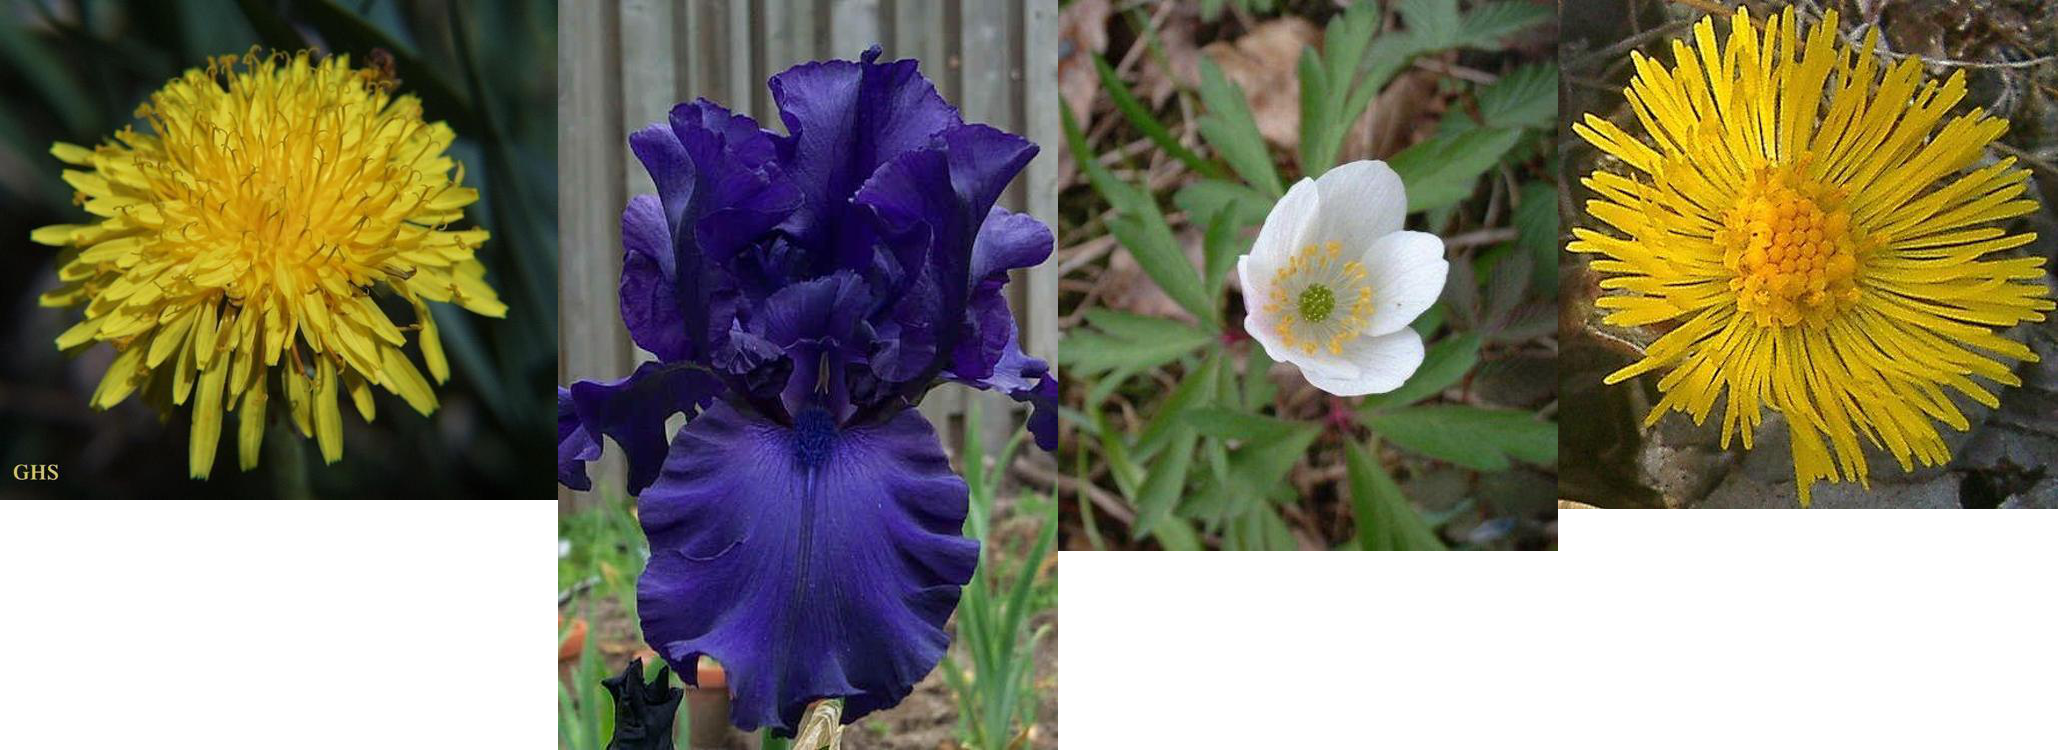

In [2]:
display_image_data(config.DATASET_PATH)

#### Initializing Preprocessors

In [2]:
config.IMAGE_PREPROCESSING_HEIGHT,config.IMAGE_PREPROCESSING_WIDTH

(64, 64)

In [3]:
uniform_aspect_preproc=UniformAspectPreprocessor(config.IMAGE_PREPROCESSING_HEIGHT, 
                                                 config.IMAGE_PREPROCESSING_WIDTH)
image_to_array_preproc=ImageToArrayPreprocessor()
preprocessors=[uniform_aspect_preproc, image_to_array_preproc]

#### Loading Image Data

In [4]:
data_loader=ImageDatumLoader(preprocessors=preprocessors)
data, labels= data_loader.load(dataset_path=config.DATASET_PATH,
                              class_index=config.CLASS_INDEX,
                              input_cast=ImageCast.RGB_64x64)

Loading Images :100% |❆❆❆❆❆❆❆❆❆❆❆❆❆❆❆❆❆❆❆❆❆❆❆❆❆❆❆❆❆| 1360 of 1360 Time: 0:00:04
INFO:root:PROCESSED 1360/1360 IMAGES.
INFO:root:MEMORY SIZE OCCUPIED: 65.28 MB


In [5]:
classes=data_loader.classes

#### Splitting Train Test Sets

In [6]:
train_x, test_x, train_y, test_y= train_test_split(data, labels, test_size=config.TEST_SIZE, random_state=42)

In [7]:
label_binarizer=LabelBinarizer()
train_y=label_binarizer.fit_transform(train_y)
test_y=label_binarizer.transform(test_y)

#### Composing TinyVGG Network

In [8]:
refiner=SGD(learning_rate=config.ALPHA)
net=TinyVGGNet.compose(height=TinyVGGNetImage.HEIGHT, 
                         width=TinyVGGNetImage.WIDTH,
                         depth=TinyVGGNetImage.DEPTH, 
                         classes=len(classes))
net.compile(loss="categorical_crossentropy", optimizer=refiner, metrics=["accuracy"])

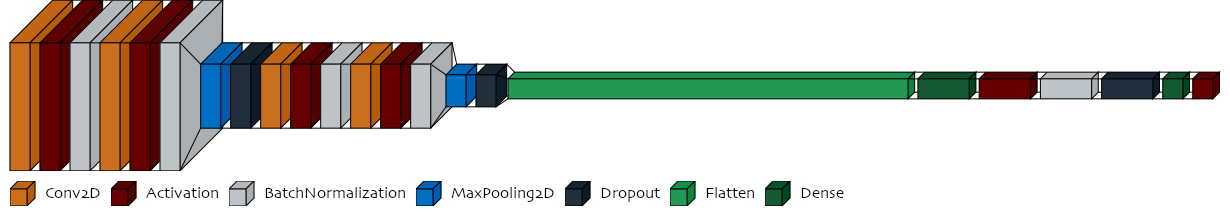

In [9]:
visualize_network(net)

#### Training Network

In [10]:
Z=net.fit(train_x, train_y, batch_size=config.BATCH_SIZE, validation_data=(test_x, test_y), 
          epochs=config.EPOCHS, verbose=1)


Epoch 1/100
16/16 [==============================] - 3s 153ms/step - loss: 3.5782 - accuracy: 0.1684 - val_loss: 2.8340 - val_accuracy: 0.0618
Epoch 2/100
16/16 [==============================] - 2s 132ms/step - loss: 1.8038 - accuracy: 0.4656 - val_loss: 2.9538 - val_accuracy: 0.0794
Epoch 3/100
16/16 [==============================] - 2s 132ms/step - loss: 1.3733 - accuracy: 0.5551 - val_loss: 3.0419 - val_accuracy: 0.1147
Epoch 4/100
16/16 [==============================] - 2s 131ms/step - loss: 1.0513 - accuracy: 0.6391 - val_loss: 3.1680 - val_accuracy: 0.1235
Epoch 5/100
16/16 [==============================] - 2s 132ms/step - loss: 0.8887 - accuracy: 0.7065 - val_loss: 3.2795 - val_accuracy: 0.1206
Epoch 6/100
16/16 [==============================] - 2s 131ms/step - loss: 0.6761 - accuracy: 0.7766 - val_loss: 3.2233 - val_accuracy: 0.1441
Epoch 7/100
16/16 [==============================] - 2s 131ms/step - loss: 0.5001 - accuracy: 0.8400 - val_loss: 3.4253 - val_accuracy: 0.1294

Epoch 58/100
16/16 [==============================] - 2s 131ms/step - loss: 0.0182 - accuracy: 0.9971 - val_loss: 1.7216 - val_accuracy: 0.5912
Epoch 59/100
16/16 [==============================] - 2s 131ms/step - loss: 0.0299 - accuracy: 0.9922 - val_loss: 1.7610 - val_accuracy: 0.5853
Epoch 60/100
16/16 [==============================] - 2s 131ms/step - loss: 0.0262 - accuracy: 0.9945 - val_loss: 1.7895 - val_accuracy: 0.5941
Epoch 61/100
16/16 [==============================] - 2s 131ms/step - loss: 0.0189 - accuracy: 0.9968 - val_loss: 1.8039 - val_accuracy: 0.5941
Epoch 62/100
16/16 [==============================] - 2s 131ms/step - loss: 0.0184 - accuracy: 0.9977 - val_loss: 1.8149 - val_accuracy: 0.5971
Epoch 63/100
16/16 [==============================] - 2s 131ms/step - loss: 0.0242 - accuracy: 0.9968 - val_loss: 1.7678 - val_accuracy: 0.6118
Epoch 64/100
16/16 [==============================] - 2s 131ms/step - loss: 0.0257 - accuracy: 0.9965 - val_loss: 1.7592 - val_accuracy:

#### Running Predictions On Testing Set

In [11]:
predictions=net.predict(test_x, batch_size=config.BATCH_SIZE)
print(classification_report(test_y.argmax(axis=1),predictions.argmax(axis=1), target_names=classes))

              precision    recall  f1-score   support

           0       0.29      0.33      0.31        15
           1       0.62      0.65      0.63        20
          10       0.79      0.70      0.75        27
          11       0.40      0.70      0.51        20
          12       0.60      0.94      0.73        16
          13       0.47      0.39      0.42        18
          14       0.82      0.39      0.53        23
          15       0.70      0.70      0.70        20
          16       0.75      0.63      0.69        19
           2       0.71      0.56      0.63        18
           3       0.83      0.45      0.59        22
           4       0.54      0.75      0.63        20
           5       0.88      0.65      0.75        23
           6       0.86      0.57      0.69        21
           7       0.27      0.35      0.30        23
           8       0.52      0.75      0.62        16
           9       0.94      0.89      0.92        19

    accuracy              

#### Visualizing Network Performance

In [27]:
plot_training_metrics(Z,epochs=config.EPOCHS, inline=True)

In [18]:
mesh, class_name,class_index=confusion_mesh(test_y.argmax(axis=1), 
                                            predictions.argmax(axis=1),
                                           encoded_classes=LabelEncoder().fit_transform(classes),
                                           class_name="16",
                                           classes=classes.tolist())

In [19]:
plot_confusion_mesh(mesh, class_name)

#### Running Random Prediction

In [32]:
test_image, class_name=random_image(config.DATASET_PATH,class_index=config.CLASS_INDEX)

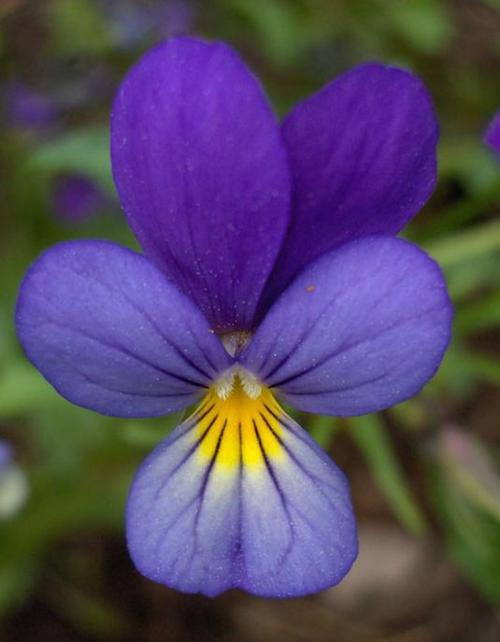

In [33]:
display_image(image=test_image)

In [34]:
class_name

'16'

In [35]:
preprocessed_test_image=preprocess_image(preprocessors=preprocessors,image=test_image, for_prediction=True)

In [36]:
test_predict=net.predict(preprocessed_test_image)

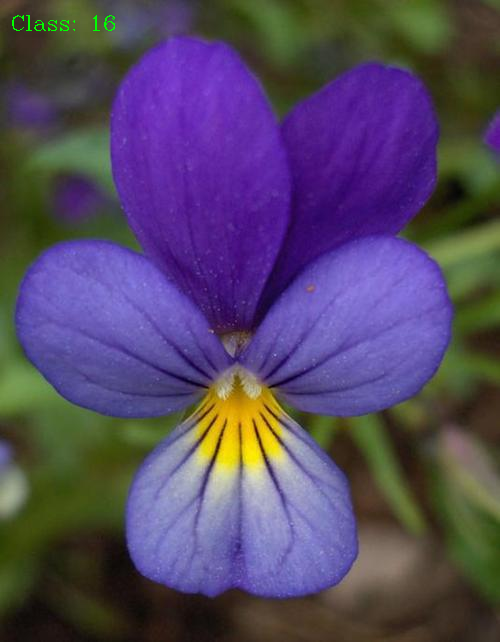

In [37]:
display_prediction(test_predict.argmax(axis=1),classes, image=test_image,font_scale=0.7 ,text_thickness=1)